In [2]:
import matplotlib as plt
import os
import pandas as pd
import json

In [3]:
g_score_path = "/media/mikodite/1EE04D66089814B4/Missile Command_MM/training/"
p_score_path = "/media/mikodite/1EE04D66089814B4/Missile Command_MM/training1/"

In [4]:
def get_score (folder,path):
    sjson = json.load(open(path+folder+"/scores.json"))
    return pd.DataFrame({'epoch':[folder],'score':[sjson['0']]})

genetic_score = pd.concat(pd.Series(os.listdir(g_score_path)).apply(get_score,path=g_score_path).tolist())
pytorch_score = pd.concat(pd.Series(os.listdir(p_score_path)).apply(get_score,path=p_score_path).tolist())
genetic_score

,epoch,score
0,1,7660
0,10,5781
0,100,8415
0,1000,5661
0,101,5489
...,...,...
0,995,17128
0,996,7235
0,997,13996
0,998,11790


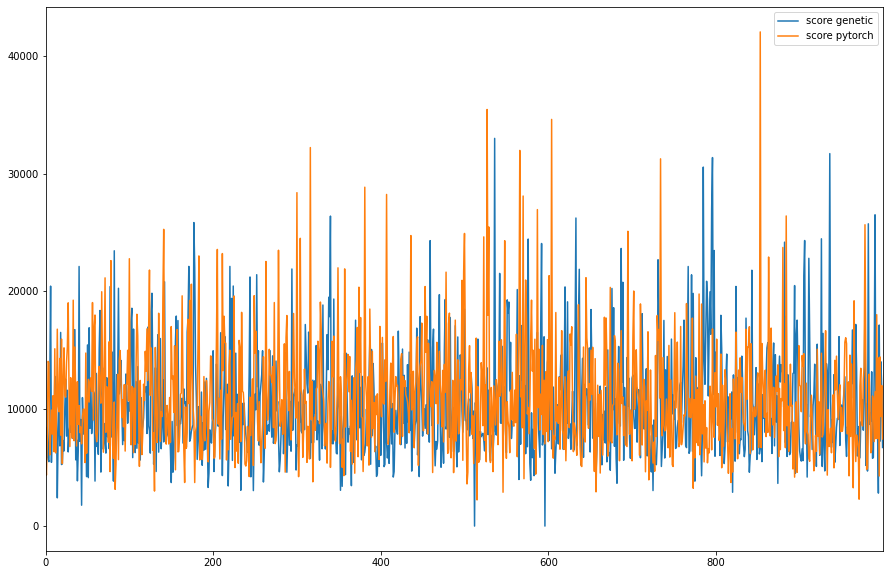

In [22]:
scores = genetic_score.merge(right=pytorch_score,how='inner',on='epoch',suffixes=(" genetic"," pytorch"))
scores.plot(figsize=(15,10))

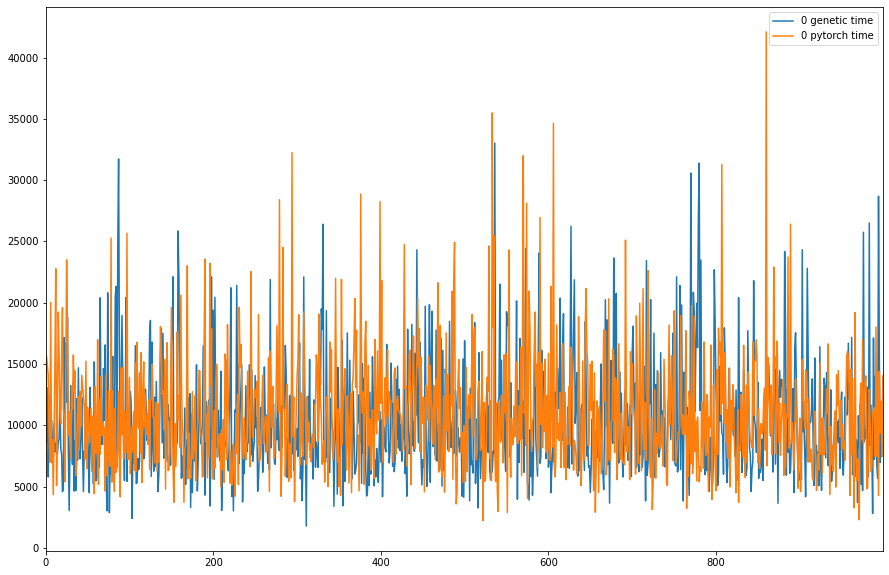

In [28]:
genetic_time = pd.read_json('/media/mikodite/1EE04D66089814B4/Missile Command_MM/all_times.json')
pytorch_time = pd.read_json("/media/mikodite/1EE04D66089814B4/Missile Command_MM/all_times1.json")
times = genetic_time.merge(right=pytorch_time,how='inner',left_index=True,right_index=True,suffixes=(' genetic time',' pytorch time'))
times.plot(figsize=(15,10))